ЛАБОРАТОРНАЯ РАБОТА 1.4

Импортируем необходимые бибилиотеки.

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

Задаём размерность матрицы и решение СЛАУ.

In [17]:
n=int(input('Задайте размерность матрицы: '))
det=float(input('Задайте определитель матрицы: '))
eps=float(input('Задайте точность: '))
result_x=np.random.sample(n).reshape(-1, 1)

Задаём элементы на главной диагонали, создаём матрицу заданного размера с заданным определителем.

In [ ]:
def create_matrix_with_determinant(det, n):
    random_matrix = np.random.rand(n, n)
    Q, _ = np.linalg.qr(random_matrix)
    D = np.eye(n)
    for i in range(n):
        D[i, i] = np.random.rand() + 1  
    current_det = np.prod(np.diag(D))
    D *= (det / current_det)**(1/n)
    A = Q.T @ D @ Q
    return A, np.diag(D)
A, eigenvalues = create_matrix_with_determinant(det, n)

array([[ 1.61545485e+00, -6.22604730e-04, -3.36469506e-02,
         9.37034395e-03,  3.05368726e-02, -1.57281238e-02,
        -2.22207002e-02,  2.42394704e-02,  4.51196479e-02,
        -2.15413712e-02],
       [-6.22604730e-04,  1.54436130e+00, -1.76346113e-02,
        -7.99038343e-02, -2.68163487e-02, -3.76832818e-02,
         6.53197855e-02,  1.97445130e-02,  4.99909105e-02,
        -8.39749279e-02],
       [-3.36469506e-02, -1.76346113e-02,  1.64101576e+00,
         3.77795696e-02, -3.90183353e-02,  7.76631433e-03,
        -2.22972578e-02,  5.19474329e-02, -7.57125488e-03,
         1.74044098e-02],
       [ 9.37034395e-03, -7.99038343e-02,  3.77795696e-02,
         1.65205454e+00, -2.84915852e-02, -7.87755197e-02,
         2.54120998e-02, -5.28433488e-02,  5.60755512e-03,
        -7.21345442e-02],
       [ 3.05368726e-02, -2.68163487e-02, -3.90183353e-02,
        -2.84915852e-02,  1.64643503e+00, -8.53419274e-03,
         3.00400218e-02, -4.48976991e-02,  1.92911510e-02,
        -7.

Вычисяем правую часть СЛАУ по известной матрице

In [19]:
b = np.dot(A,result_x)

In [ ]:
lam_min = min(eigenvalues)
lam_max = max(eigenvalues)

Найдём численное решение СЛАУ с помощью метода Ричардсона для m = 3.

In [20]:
def Richardson(matrix, n, m, eps, eigenvalues, b):
    it = 0
    alpha = []
    lam_min = min(eigenvalues)
    lam_max = max(eigenvalues)
    for i in range(1,m+1):
        t = (np.cos(np.pi * (2 * i) / (2 * m)))
        lam = ((lam_min + lam_max) / 2 + (lam_max - lam_min) / 2 * t)
        alpha.append(1 / lam)
    alpha.reverse()
    C = max([abs(1 - min(alpha) * lam_min), abs(1 - min(alpha) * lam_max)])
    q = C/(1-C)
    x0 = np.ones(n).reshape(-1, 1)
    x = np.zeros(n).reshape(-1, 1)
    while  q * np.linalg.norm(x - x0, 2) > eps:
        for i in range(m):
            x0 = np.copy(x)
            x = x0 - alpha[i] * (np.dot(matrix, x0) - b)
        it += 3
    return [x, it]

Вычислим норму фактической ошибки.

In [21]:
np.linalg.norm(Richardson(A, n, 3, eps, eigenvalues, b)[0] - result_x, 2)

np.float64(1.1278172302524617e-05)

Вычислим норму невязки.

In [22]:
np.linalg.norm(np.dot(A, Richardson(A, n, 3, eps, eigenvalues, b)[0]) - b, 2)

np.float64(1.986564218803329e-05)

Посмотрим на число итераций.

In [23]:
Richardson(A, n, 3, eps, eigenvalues, b)[1]

6

Построим зависимости норм фактической ошибки и невязки от заданной точности и зависимость числа итераций от заданной точности.

In [24]:
x = [0.1,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001]
many_results_it = [Richardson(A, n, 3, epsilon, eigenvalues, b) for epsilon in x]
many_results = [i[0] for i in many_results_it]
many_it = [i[1] for i in many_results_it]

In [25]:
many_errors = [np.linalg.norm(num_x - result_x, 2) for num_x in many_results]
many_nevazka = [np.linalg.norm(np.dot(A, num_x) - b, 2) for num_x in many_results]

Text(0.5, 1.0, 'Зависимость числа итераций от заданной точности')

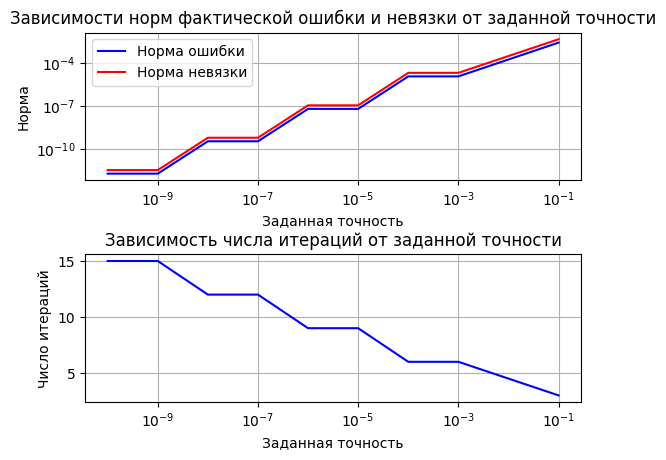

In [26]:
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,1,1)
plt.loglog(x, many_errors, color = 'blue', label = 'Норма ошибки')
plt.loglog(x, many_nevazka, color = 'red', label = 'Норма невязки')
plt.grid(True)
plt.legend()
plt.xlabel('Заданная точность')
plt.ylabel('Норма')
plt.title('Зависимости норм фактической ошибки и невязки от заданной точности')

plt.subplot(2,1,2)
plt.plot(x, many_it, color = 'blue')
plt.xscale('log')
plt.grid('True')
plt.xlabel('Заданная точность')
plt.ylabel('Число итераций')
plt.title('Зависимость числа итераций от заданной точности')

Построим зависимость числа итераций от определителя матрицы при фиксированной точности и зависимости норм фактической ошибки и невязки от определителя матрицы.

In [27]:
eps = 0.001
g = 15
many_elignvalues = []
many_matrix = []
many_b = []
many_det = [0.1**(k) for k in range(1, g+1)]
many_matrix_elignvalues = [create_matrix_with_determinant(det, n) for det in many_det]

In [28]:
for i in range(g):
    many_matrix.append(many_matrix_elignvalues[i][0])
    many_elignvalues.append(many_matrix_elignvalues[i][1])
for i in range(g):
    many_b.append(np.dot(many_matrix[i], result_x))
many_it = [Richardson(many_matrix[i], n, 3, eps, many_elignvalues[i], many_b[i])[1] for i in range(g)]
many_num_x = [Richardson(many_matrix[i], n, 3, eps, many_elignvalues[i], many_b[i])[0] for i in range(g)]
many_errors = [np.linalg.norm(num_x - result_x, 2) for num_x in many_num_x]
many_nevazka = [np.linalg.norm(np.dot(many_matrix[i], many_num_x[i]) - many_b[i], 2) for i in range(g)]

Text(0.5, 1.0, 'Зависимости норм ошибки и невязки от определителя матрицы')

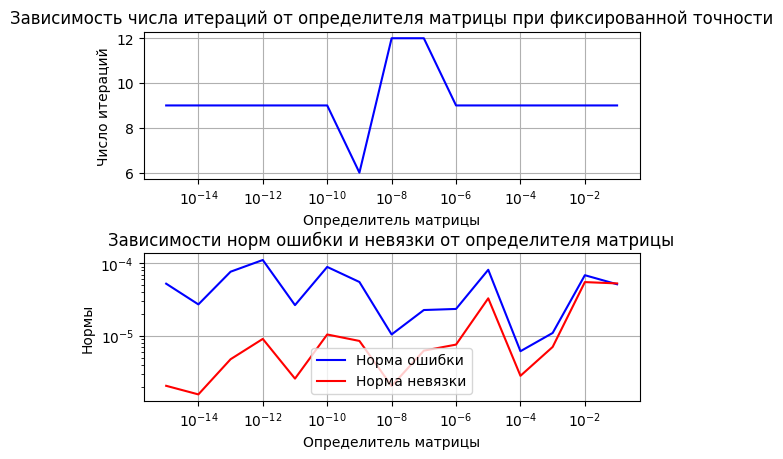

In [29]:
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,1,1)
plt.plot(many_det, many_it, color = 'blue')
plt.xscale('log')
plt.grid('True')
plt.xlabel('Определитель матрицы')
plt.ylabel('Число итераций')
plt.title("Зависимость числа итераций от определителя матрицы при фиксированной точности")

plt.subplot(2,1,2)
plt.loglog(many_det, many_errors, color = 'blue', label = 'Норма ошибки')
plt.loglog(many_det, many_nevazka, color = 'red', label = 'Норма невязки')
plt.legend()
plt.grid(True)
plt.xlabel('Определитель матрицы')
plt.ylabel('Нормы')
plt.title('Зависимости норм ошибки и невязки от определителя матрицы')